## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [0]:
import numpy as np
import keras
from keras.datasets import cifar10, mnist, fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
# import pickle
# from matplotlib import pyplot as plt
# import seaborn as sns
# plt.rcParams['figure.figsize'] = (15, 8)

In [0]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 2s 1us/step


In [47]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

### Find no.of samples are there in training and test datasets

In [7]:
print('--- THE DATA number of samples and dimensions of the image---')
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

--- THE DATA number of samples and dimensions of the image---
x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


### Find dimensions of an image in the dataset

In [0]:
# It is printed in the above line of code.

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [0]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)


### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [0]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')


### Normalize both the train and test image data from 0-255 to 0-1

In [0]:
x_train /= 255
x_test /= 255

### Import the necessary layers from keras to build the model

In [0]:
## All the import done in first line. Convolution2D, MaxPooling2D, Dense, Activation, Dropout, Flatten, Reshape

### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [0]:
TRAIN = False
BATCH_SIZE = 32
EPOCHS = 10

In [31]:
# Define model
    model1 = Sequential()

    # 1st Conv Layer
    model1.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
    model1.add(Activation('relu'))

    # 2nd Conv Layer
    model1.add(Convolution2D(32, 3, 3))
    model1.add(Activation('relu'))

    # Fully Connected Layer
    model1.add(Flatten())
    model1.add(Dense(128))
    model1.add(Activation('relu'))

    # Prediction Layer
    model1.add(Dense(10))
    model1.add(Activation('softmax'))

    # Loss and Optimizer
    model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Store Training Results
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
    callback_list = [early_stopping]

    # Train the model2
    model1.fit(x_train, y_train, batch_size=BATCH_SIZE, nb_epoch=EPOCHS, 
              validation_data=(x_test, y_test), callbacks=callback_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 15s 246us/step - loss: 0.3713 - acc: 0.8659 - val_loss: 0.2889 - val_acc: 0.8952
Epoch 2/10
60000/60000 [==============================] - 15s 248us/step - loss: 0.2278 - acc: 0.9155 - val_loss: 0.2546 - val_acc: 0.9075
Epoch 3/10
60000/60000 [==============================] - 14s 237us/step - loss: 0.1642 - acc: 0.9378 - val_loss: 0.2404 - val_acc: 0.9143
Epoch 4/10
60000/60000 [==============================] - 14s 236us/step - loss: 0.1126 - acc: 0.9571 - val_loss: 0.2877 - val_acc: 0.9123
Epoch 5/10
60000/60000 [==============================] - 14s 236us/step - loss: 0.0767 - acc: 0.9720 - val_loss: 0.2849 - val_acc: 0.9161
Epoch 6/10
60000/60000 [==============================] - 14s 241us/step - loss: 0.0527 - acc: 0.9807 - val_loss: 0.3471 - val_acc: 0.9124
Epoch 7/10
60000/60000 [==============================] - 14s 237us/step - loss: 0.0374 - acc: 0.9869 - val_loss: 0.

In [32]:
loss_and_metrics = model1.evaluate(x_test, y_test)
print(loss_and_metrics)

10000/10000 [==============================] - 1s 60us/step
[0.5015459220312536, 0.9152]


### Now, build another model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [0]:
TRAIN = False
BATCH_SIZE = 32
EPOCHS = 10

In [35]:

    # Define model
    model2 = Sequential()

    # 1st Conv Layer
    model2.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
    model2.add(Activation('relu'))

    # 2nd Conv Layer
    model2.add(Convolution2D(32, 3, 3))
    model2.add(Activation('relu'))

    #Add a MaxPooling Layer of size 2X2 
    model2.add(MaxPooling2D(pool_size=(2, 2),name='max_2'))

    #Apply Dropout with 0.25 probability 
    model2.add(Dropout(0.25,name='drop_1'))


    # Fully Connected Layer
    model2.add(Flatten())
    model2.add(Dense(128))
    model2.add(Activation('relu'))

    # Prediction Layer
    model2.add(Dense(10))
    model2.add(Activation('softmax'))

    # Loss and Optimizer
    model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Store Training Results
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
    callback_list = [early_stopping]

    # Train the model2
    model2.fit(x_train, y_train, batch_size=BATCH_SIZE, nb_epoch=EPOCHS, 
              validation_data=(x_test, y_test), callbacks=callback_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 191us/step - loss: 0.3902 - acc: 0.8605 - val_loss: 0.3005 - val_acc: 0.8916
Epoch 2/10
60000/60000 [==============================] - 11s 179us/step - loss: 0.2593 - acc: 0.9044 - val_loss: 0.2536 - val_acc: 0.9071
Epoch 3/10
60000/60000 [==============================] - 11s 177us/step - loss: 0.2133 - acc: 0.9207 - val_loss: 0.2520 - val_acc: 0.9080
Epoch 4/10
60000/60000 [==============================] - 11s 179us/step - loss: 0.1778 - acc: 0.9336 - val_loss: 0.2329 - val_acc: 0.9185
Epoch 5/10
60000/60000 [==============================] - 11s 182us/step - loss: 0.1500 - acc: 0.9426 - val_loss: 0.2356 - val_acc: 0.9191
Epoch 6/10
60000/60000 [==============================] - 11s 182us/step - loss: 0.1289 - acc: 0.9509 - val_loss: 0.2419 - val_acc: 0.9180
Epoch 7/10
60000/60000 [==============================] - 11s 176us/step - loss: 0.1092 - acc: 0.9590 - val_loss: 0.

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
from keras.preprocessing.image import ImageDataGenerator

# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

# Prepare the generator
datagen.fit(x_train)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

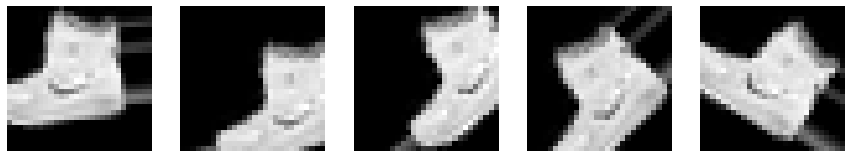

In [27]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [38]:
model2.fit_generator(datagen.flow(x_train, y_train,batch_size=64),
                    samples_per_epoch=x_train.shape[0],
                    nb_epoch=10,
                    validation_data=(x_test, y_test), callbacks=callback_list)

Epoch 1/10
  6/937 [..............................] - ETA: 22s - loss: 0.6231 - acc: 0.7604 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., steps_per_epoch=937, epochs=10)`
  after removing the cwd from sys.path.


937/937 [==============================] - 18s 20ms/step - loss: 0.5157 - acc: 0.8103 - val_loss: 0.4580 - val_acc: 0.8427
Epoch 2/10
937/937 [==============================] - 18s 19ms/step - loss: 0.4880 - acc: 0.8215 - val_loss: 0.4291 - val_acc: 0.8477
Epoch 3/10
937/937 [==============================] - 18s 20ms/step - loss: 0.4810 - acc: 0.8239 - val_loss: 0.4168 - val_acc: 0.8537
Epoch 4/10
937/937 [==============================] - 18s 19ms/step - loss: 0.4680 - acc: 0.8277 - val_loss: 0.4257 - val_acc: 0.8531
Epoch 5/10
937/937 [==============================] - 18s 19ms/step - loss: 0.4584 - acc: 0.8314 - val_loss: 0.4114 - val_acc: 0.8538
Epoch 6/10
937/937 [==============================] - 17s 18ms/step - loss: 0.4501 - acc: 0.8351 - val_loss: 0.4319 - val_acc: 0.8503
Epoch 7/10
937/937 [==============================] - 17s 18ms/step - loss: 0.4487 - acc: 0.8358 - val_loss: 0.4042 - val_acc: 0.8600
Epoch 8/10
937/937 [==============================] - 17s 18ms/step - los

###  Report the final train and validation accuracy

In [39]:
loss_and_metrics = model2.evaluate(x_train, y_train)
print(loss_and_metrics)

60000/60000 [==============================] - 4s 60us/step
[0.3618240821202596, 0.8689833333333333]


## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [0]:
from keras.preprocessing.image import ImageDataGenerator

### **Load CIFAR10 dataset**

In [0]:
from keras.datasets import cifar10

In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

In [67]:
np.unique(y_train)
# np.unique(x_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [63]:
print('--- THE DATA number of samples and dimensions of the image---')
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

--- THE DATA number of samples and dimensions of the image---
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [0]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)


In [0]:
x_train = x_train.reshape(x_train.shape[0], 32, 32, 3).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3).astype('float32')


In [0]:
x_train /= 255
x_test /= 255

In [0]:
TRAIN = False
BATCH_SIZE = 32
EPOCHS = 10

In [72]:
 # Define model
    model2 = Sequential()

    # 1st Conv Layer
    model2.add(Convolution2D(32, 3, 3, input_shape=(32, 32, 3)))
    model2.add(Activation('relu'))

    # 2nd Conv Layer
    model2.add(Convolution2D(32, 3, 3))
    model2.add(Activation('relu'))

    #Add a MaxPooling Layer of size 2X2 
    model2.add(MaxPooling2D(pool_size=(2, 2),name='max_2'))

    #Apply Dropout with 0.25 probability 
    model2.add(Dropout(0.25,name='drop_1'))


    # Fully Connected Layer
    model2.add(Flatten())
    model2.add(Dense(128))
    model2.add(Activation('relu'))

    # Prediction Layer
    model2.add(Dense(10))
    model2.add(Activation('softmax'))

    # Loss and Optimizer
    model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Store Training Results
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
    callback_list = [early_stopping]

    # Train the model2
    model2.fit(x_train, y_train, batch_size=BATCH_SIZE, nb_epoch=EPOCHS, 
              validation_data=(x_test, y_test), callbacks=callback_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 13s 267us/step - loss: 1.3994 - acc: 0.4982 - val_loss: 1.1307 - val_acc: 0.6001
Epoch 2/10
50000/50000 [==============================] - 12s 242us/step - loss: 1.0635 - acc: 0.6243 - val_loss: 1.0237 - val_acc: 0.6440
Epoch 3/10
50000/50000 [==============================] - 12s 243us/step - loss: 0.9174 - acc: 0.6783 - val_loss: 0.9425 - val_acc: 0.6715
Epoch 4/10
50000/50000 [==============================] - 12s 235us/step - loss: 0.8098 - acc: 0.7152 - val_loss: 0.9688 - val_acc: 0.6709
Epoch 5/10
50000/50000 [==============================] - 11s 224us/step - loss: 0.7176 - acc: 0.7453 - val_loss: 0.9363 - val_acc: 0.6815
Epoch 6/10
50000/50000 [==============================] - 11s 228us/step - loss: 0.6421 - acc: 0.7721 - val_loss: 0.9738 - val_acc: 0.6730
Epoch 7/10
50000/50000 [==============================] - 11s 221us/step - loss: 0.5613 - acc: 0.7993 - val_loss: 0.

### **Prepare/fit the generator.**

In [73]:

model2.fit_generator(datagen.flow(x_train, y_train,batch_size=32),
                    samples_per_epoch=x_train.shape[0],
                    nb_epoch=10,
                    validation_data=(x_test, y_test), callbacks=callback_list)

Epoch 1/10
   7/1562 [..............................] - ETA: 31s - loss: 2.6980 - acc: 0.3393

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., steps_per_epoch=1562, epochs=10)`
  """


1562/1562 [==============================] - 29s 19ms/step - loss: 1.5509 - acc: 0.4503 - val_loss: 1.1708 - val_acc: 0.5965
Epoch 2/10
1562/1562 [==============================] - 29s 18ms/step - loss: 1.4074 - acc: 0.4967 - val_loss: 1.0465 - val_acc: 0.6276
Epoch 3/10
1562/1562 [==============================] - 29s 19ms/step - loss: 1.3626 - acc: 0.5134 - val_loss: 1.1249 - val_acc: 0.6103
Epoch 4/10
1562/1562 [==============================] - 29s 19ms/step - loss: 1.3219 - acc: 0.5257 - val_loss: 1.2148 - val_acc: 0.5889
Epoch 5/10
1562/1562 [==============================] - 29s 19ms/step - loss: 1.2993 - acc: 0.5318 - val_loss: 1.1463 - val_acc: 0.5987
Epoch 6/10
1562/1562 [==============================] - 29s 19ms/step - loss: 1.2812 - acc: 0.5412 - val_loss: 1.1926 - val_acc: 0.5892
Epoch 7/10
1562/1562 [==============================] - 29s 19ms/step - loss: 1.2659 - acc: 0.5477 - val_loss: 1.2160 - val_acc: 0.5856
Epoch 00007: early stopping


### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

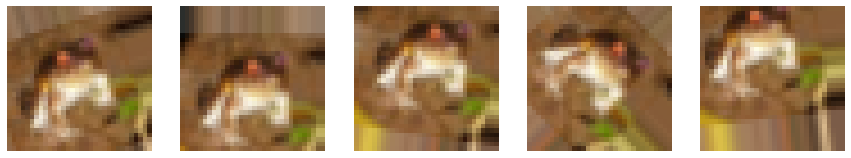

In [74]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()